## our business problem to predict the Average daily rate of hotel booking
### Importing the required libraries for our business problem


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#lodaing the dataset
df=pd.read_csv('hotel_bookings.csv')

In [3]:
#getting the first five info
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
#looking for the null values in the dataset
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
#handling the null values 
df['children']=df['children'].fillna(0) #filling the null values of children column with 0
df['agent']=df['agent'].fillna(0) #filling the null values of agent column with 0
df['country']=df['country'].fillna('PRT') #filling the null values of country column with mode value
df=df.drop('company',axis=1) #dropping the company column as it is having huge null values 

In [8]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

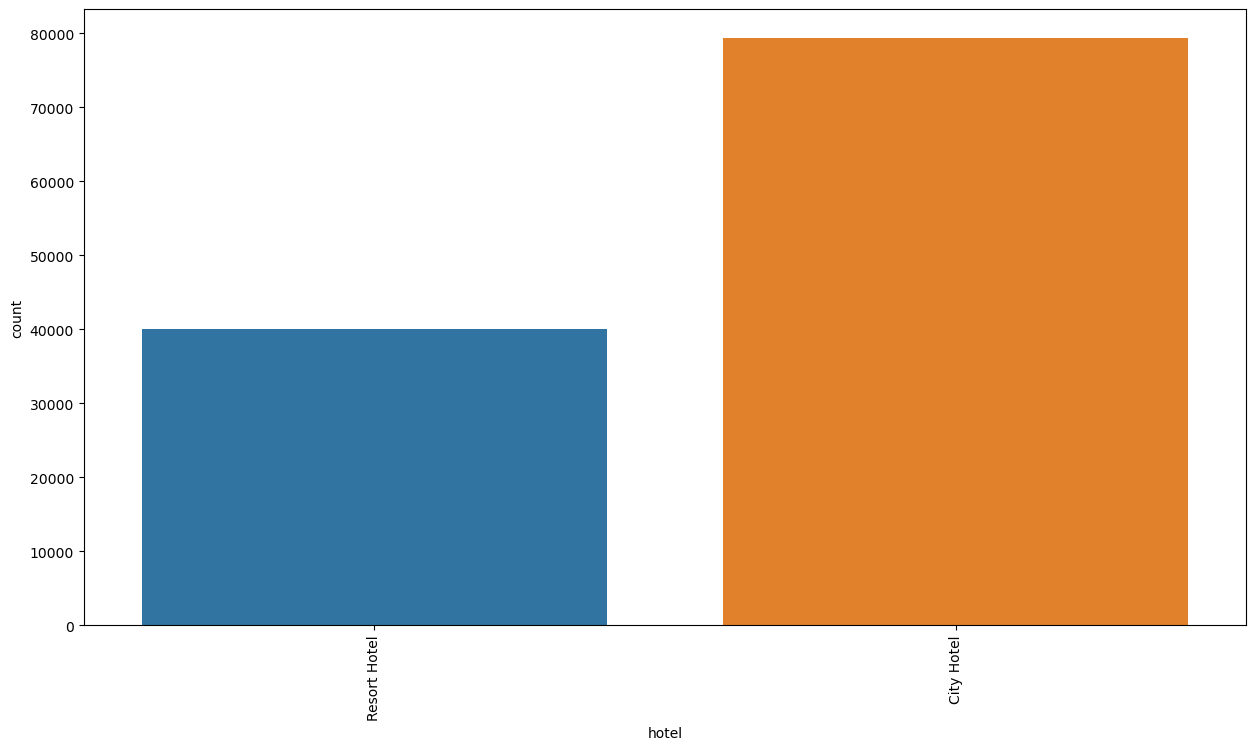

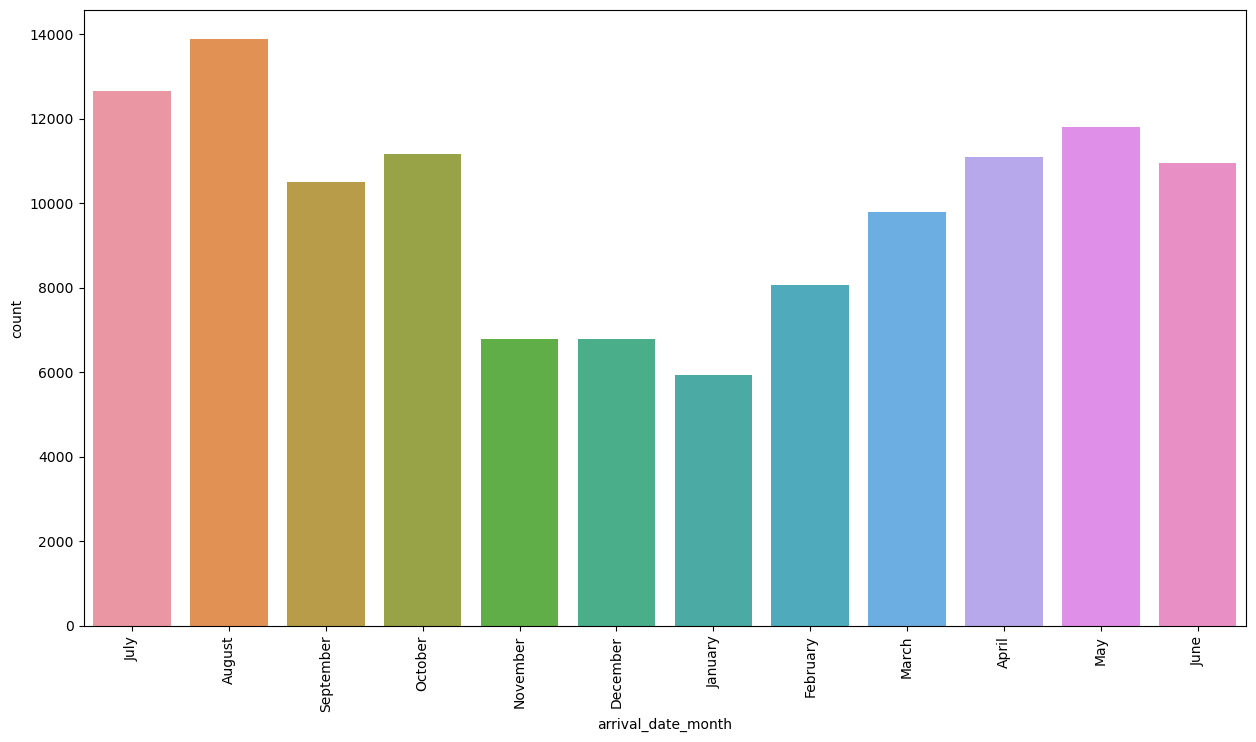

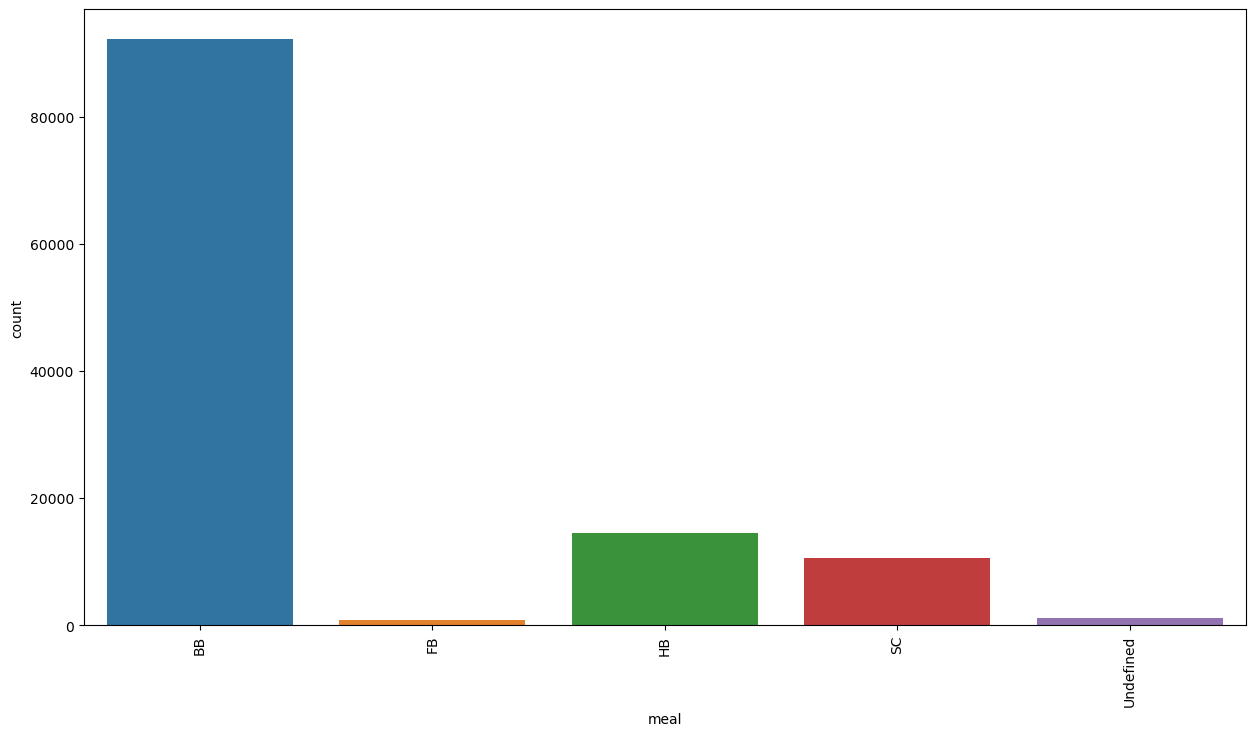

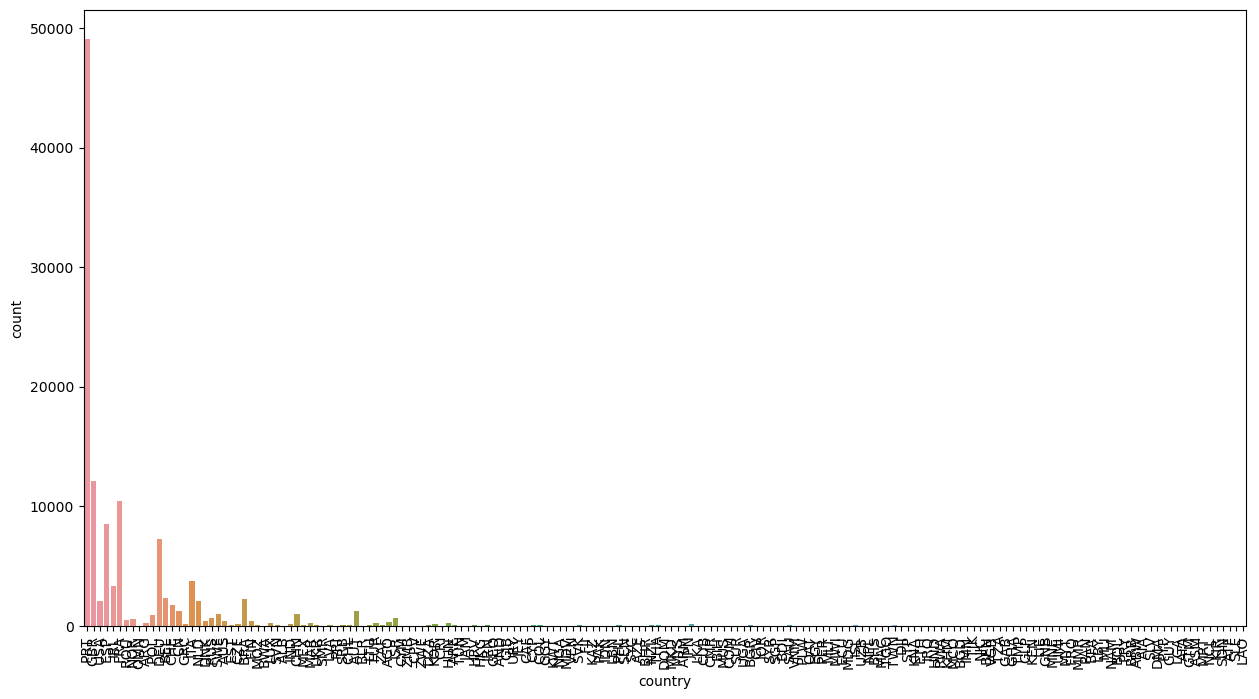

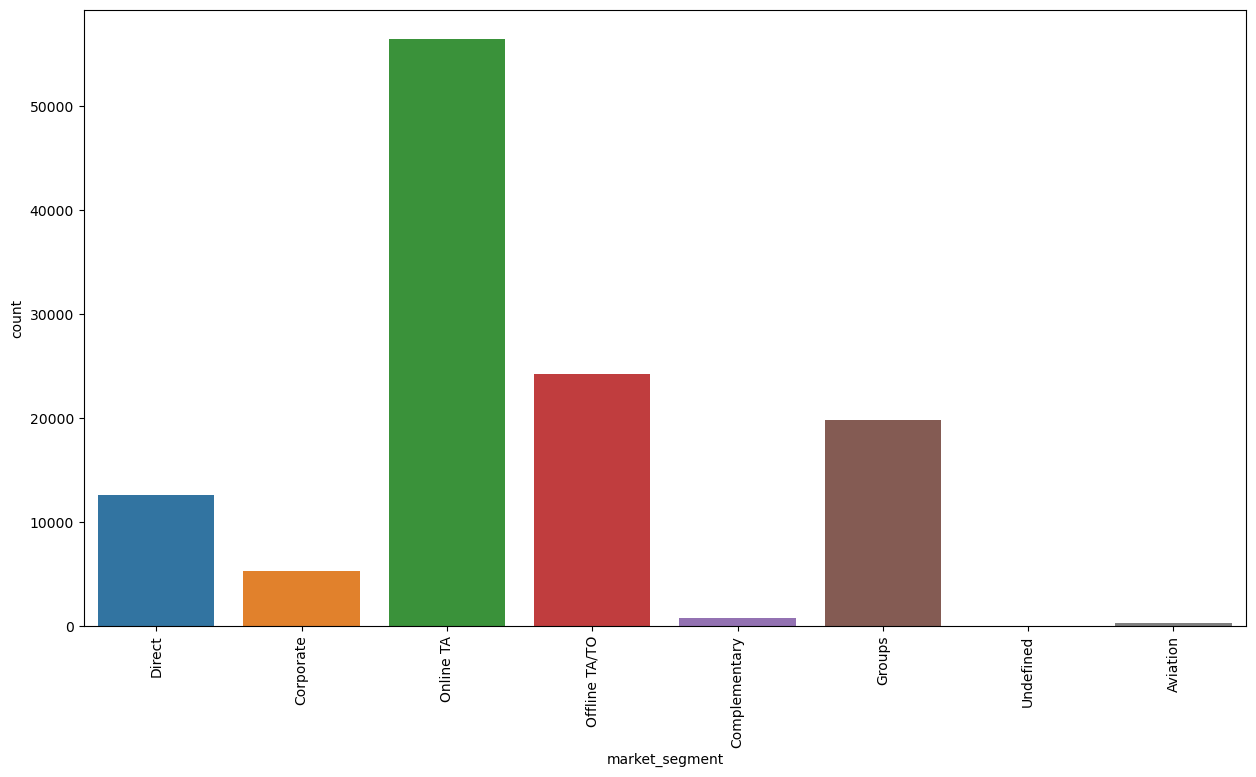

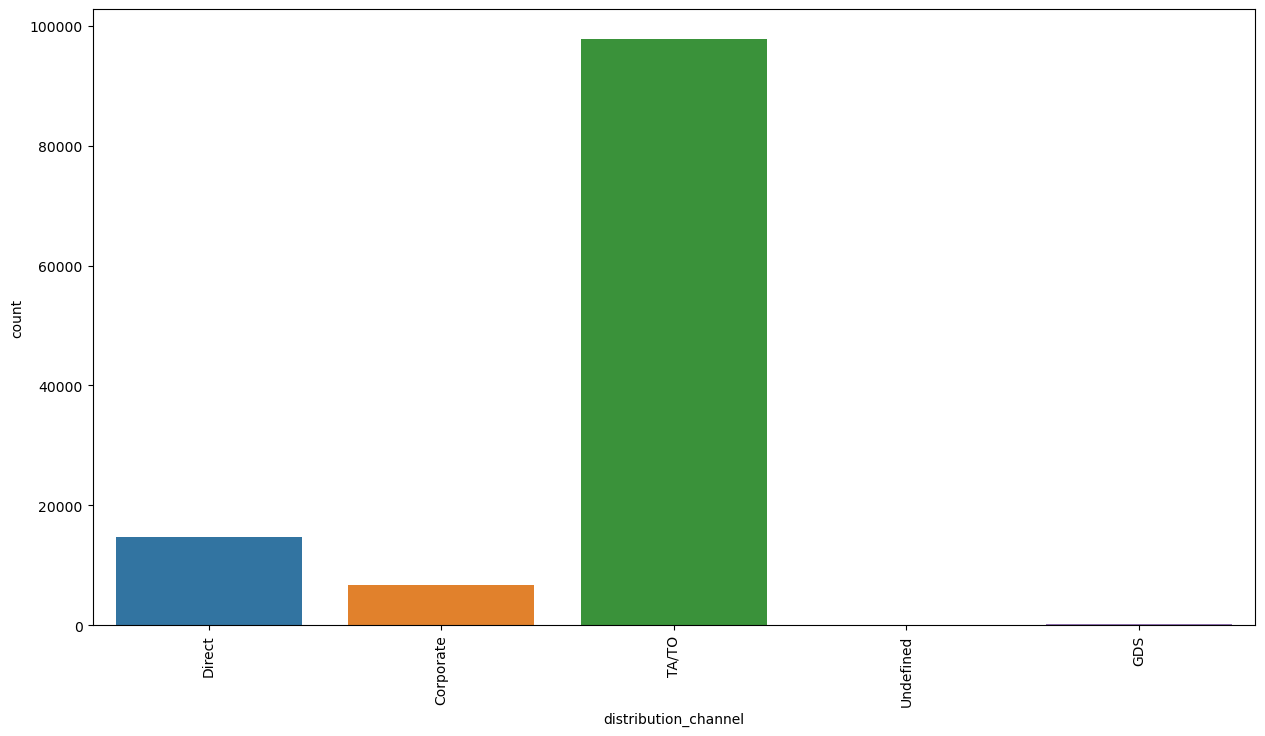

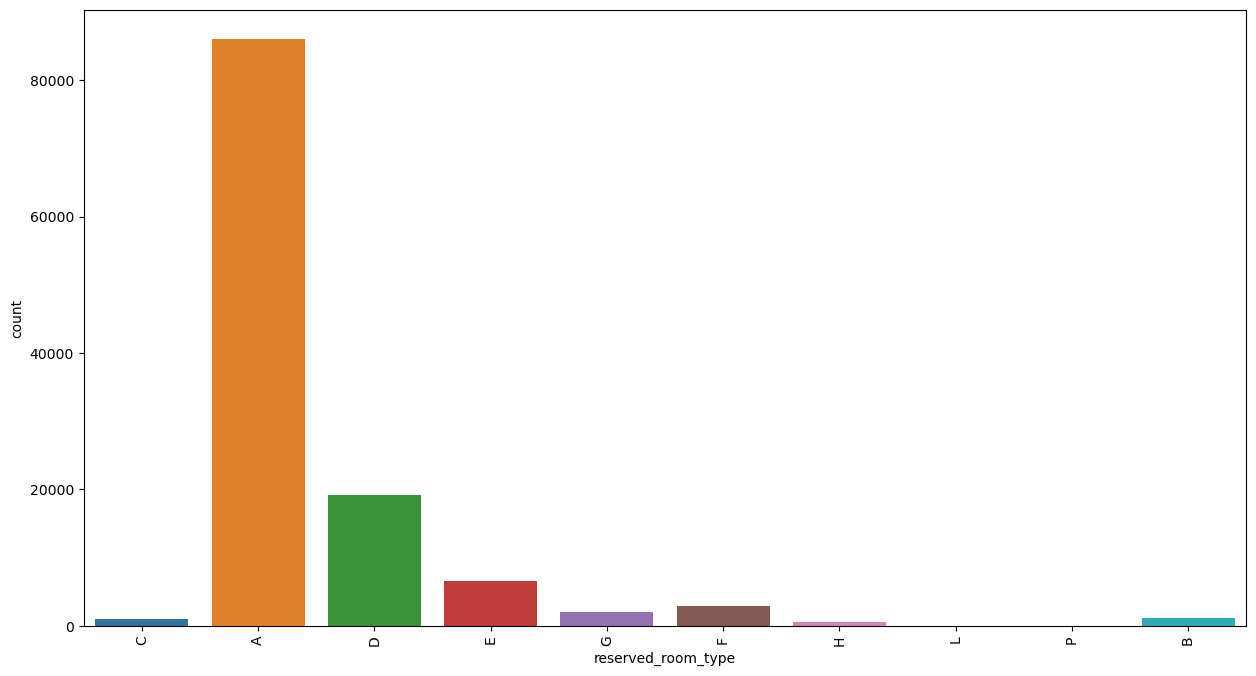

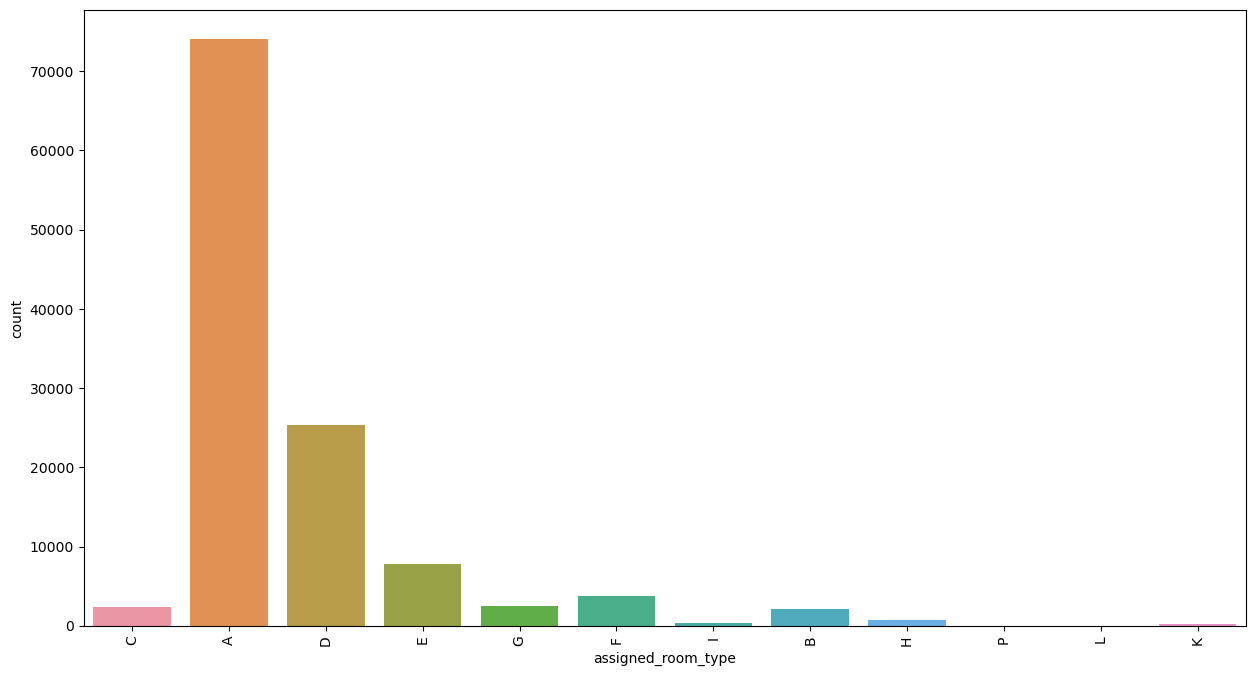

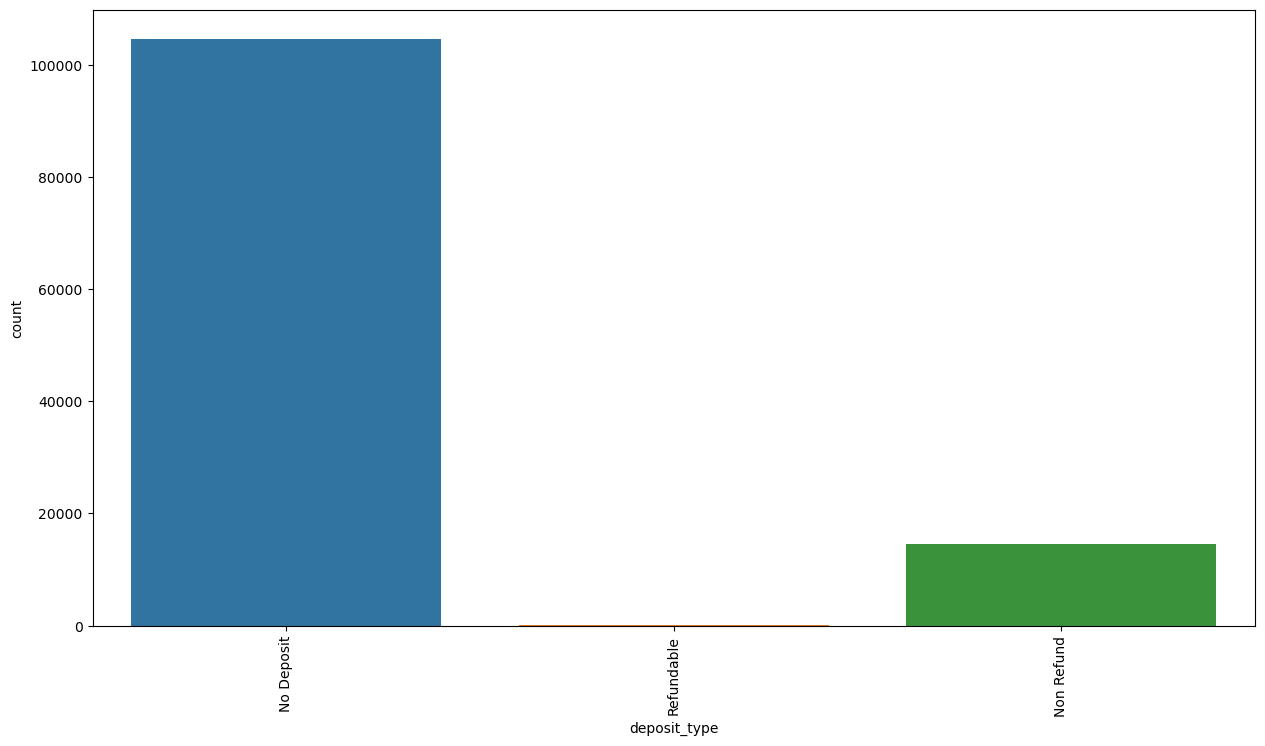

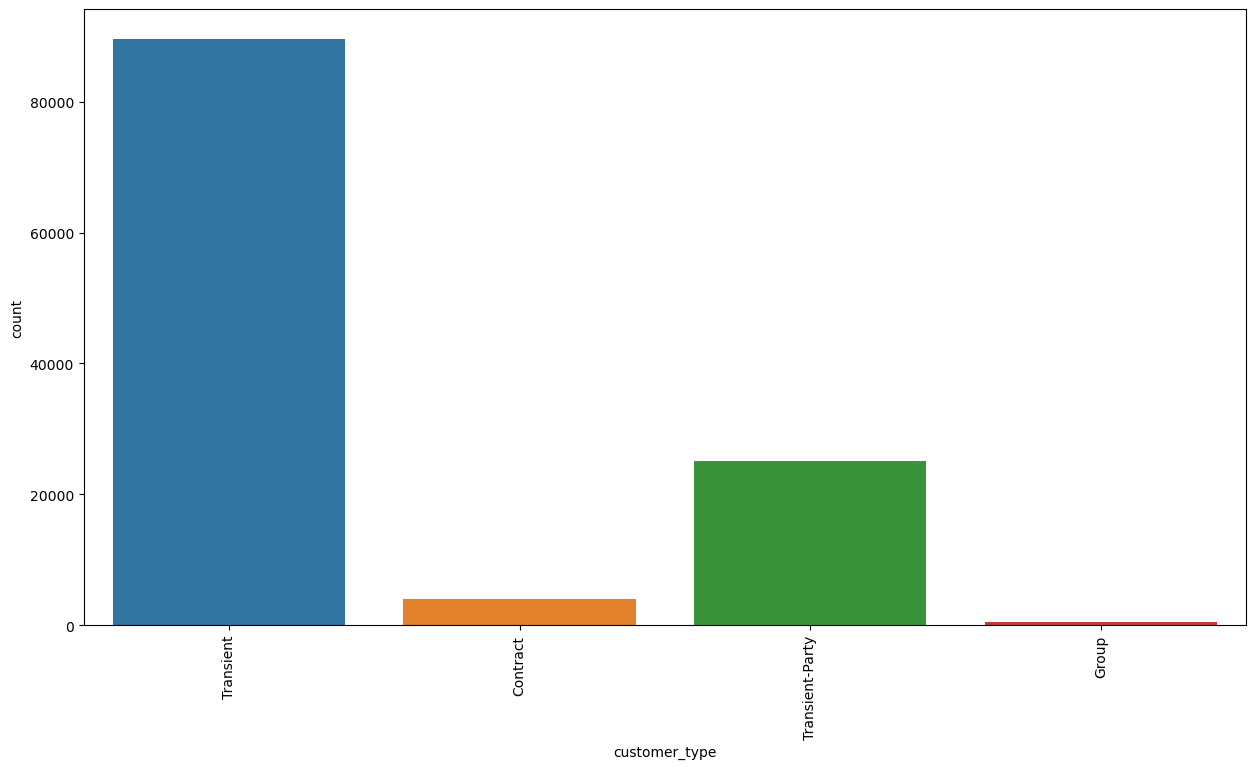

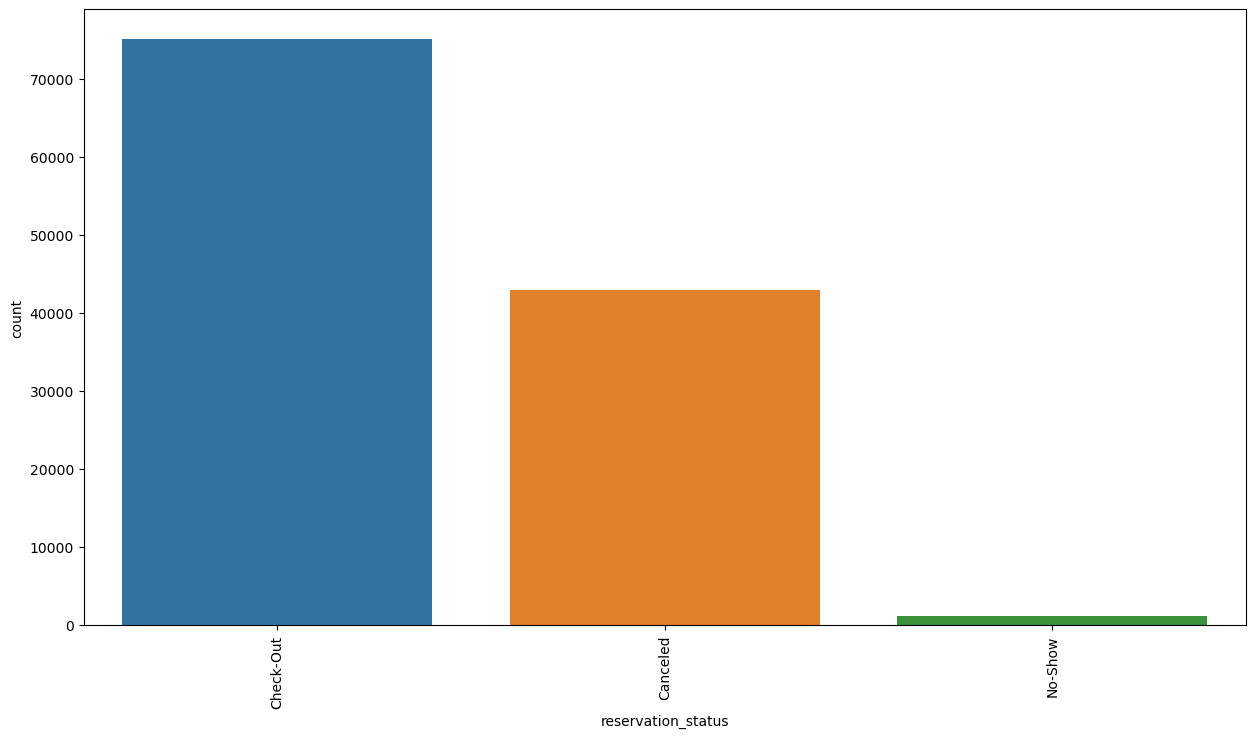

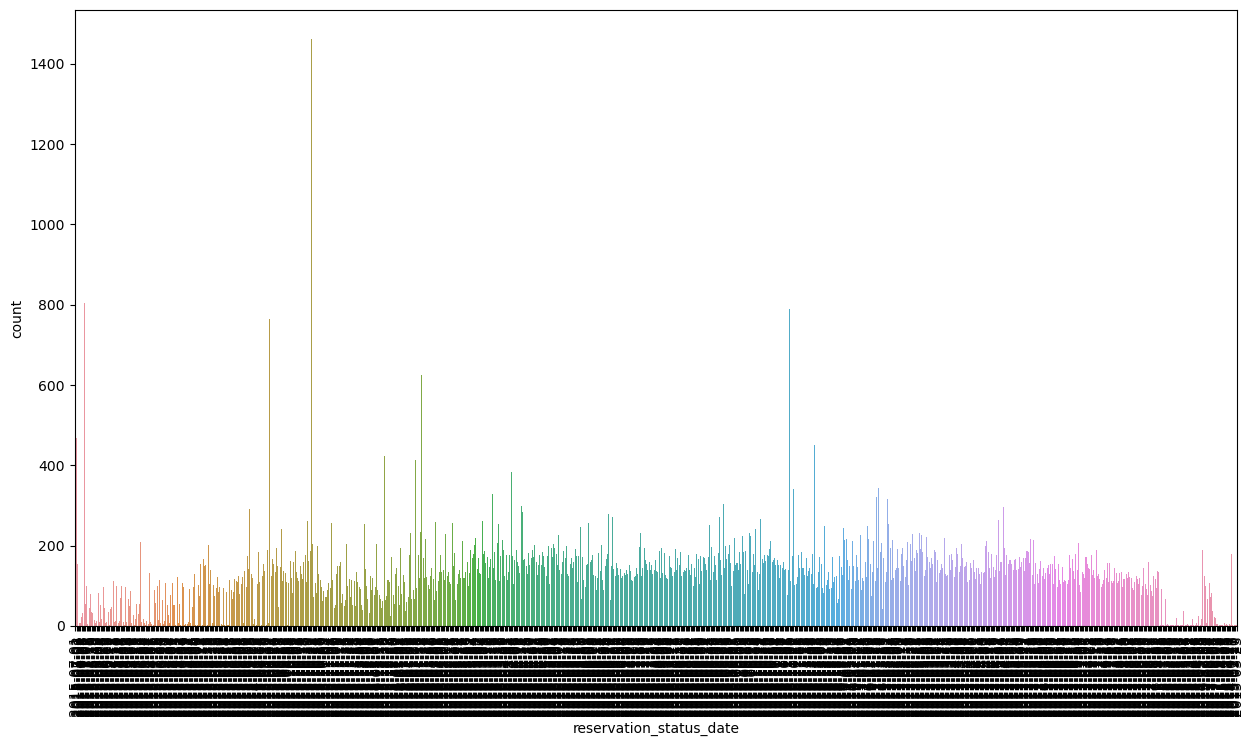

In [13]:
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(15, 8))
    sns.countplot(x=col,data=df)
    plt.xticks(rotation=90)
    plt.show()

### Feature engineering

In [16]:
#creating a new column family by merging features like adults, children and babies
df['family']=df['adults']+df['children']+df['babies']
df=df.drop(['adults','children','babies'],axis=1)


### Dropping the columns which are not necessary for our model

In [17]:
df=df.drop(['arrival_date_week_number','arrival_date_day_of_month','reservation_status_date'],axis=1)
df.shape

(119390, 26)

### Transforming the categorical columns to numerical 

In [18]:
df['arrival_date_year']=df['arrival_date_year'].astype('object')

In [19]:
cat=[]
for col in df.select_dtypes(include='object').columns:
    cat.append(df[col])


In [20]:
#converting categorical values into numerical by using target encoder
from sklearn.preprocessing import TargetEncoder

In [21]:
category= np.array(cat).T
target=df['adr']
ec= TargetEncoder(target_type='auto',smooth='auto')
new_val=ec.fit_transform(category,target)
a=pd.DataFrame(new_val)

In [22]:
df=df.drop(df.select_dtypes(include='object'),axis=1)

In [24]:
#creating a new dataset
new_df=pd.concat([df,a],axis=1)
new_df.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,...,2,3,4,5,6,7,8,9,10,11
0,0,342,0,0,0,0,0,3,0.0,0,...,126.641227,99.292315,91.568847,115.325890,106.361794,160.028136,112.862373,103.336794,106.915299,99.787360
1,0,737,0,0,0,0,0,4,0.0,0,...,126.635894,99.263795,91.591133,115.373254,106.539963,159.064969,112.996374,103.434537,106.840321,99.905329
2,0,7,0,1,0,0,0,0,0.0,0,...,126.699834,99.380139,95.773761,115.823632,107.071278,90.952756,114.664779,103.526456,107.080040,100.042104
3,0,13,0,1,0,0,0,0,304.0,0,...,126.945538,99.574463,96.394968,69.363287,69.337011,90.804206,93.176701,103.684170,107.201096,100.117424
4,0,14,0,2,0,0,0,0,240.0,0,...,126.641227,99.292315,95.614121,117.165168,103.191378,90.677020,93.015781,103.336794,106.915299,99.787360


## Splitting the data into training and test dataset

In [25]:
x=new_df.drop('adr',axis=1)
y=df['adr']
x= x.rename(str,axis="columns")

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x,y ,random_state=42,  
                                   test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((89542, 25), (29848, 25), (89542,), (29848,))

### Scaling the data values

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

## Creating a model for our business problem

In [30]:

from sklearn.neural_network import MLPRegressor

In [31]:
mlp= MLPRegressor(hidden_layer_sizes=(60,50))
mlp.fit(X_train,y_train)

C:\Users\puja singh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(60, 50))

In [32]:
y_pred=mlp.predict(X_test)

In [33]:
y_pred

array([89.05389808, 82.37594018, 95.30403205, ..., 94.87516036,
       75.42765231, 32.33845818])

## Evaluating our algorithm's performance

In [34]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.8024375854341929
454.26821668048314
14.107364701786402


## Conclusion
So our model's R' Sqaure score is 80.24% and is working fine